In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

##  Load MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28*28)) / 256
x_test = x_test.reshape((10000, 28*28)) / 256
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


## Lets plot them using TSNE

I am using first 750 examples from the test_set as it's smaller and easier to visualize

In [3]:
test_set = x_test[:750]
test_labels = y_test[:750]
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]


### Define a function to plot our tsne vectors

In [4]:
def plot_mnist_tsne(vecs, labels):
    colors = ["blue", "green", "orange", "red", "black", "purple", "magenta", "cyan", "violet", "yellow"]
    markers = [".", "o", "v", "1", "8", "s", "p", "*", "x", "d"]
    
    fig, ax = plt.subplots(figsize=(15,8))

    for i in range(10):
        c = colors[i]
        m = markers[i]
        x = vecs[labels==i]
        ax.scatter(x[:,0], x[:,1], c=c, marker=m, label=str(i))
        
    ax.legend(loc='upper right',bbox_to_anchor=(1.075, 1), shadow=True)
    plt.show()

### 1. Using vanila vectors

In [5]:
tnse_vecs_1 = TSNE(n_components=2, perplexity=10).fit_transform(test_set)
print(tnse_vecs_1.shape)

(750, 2)


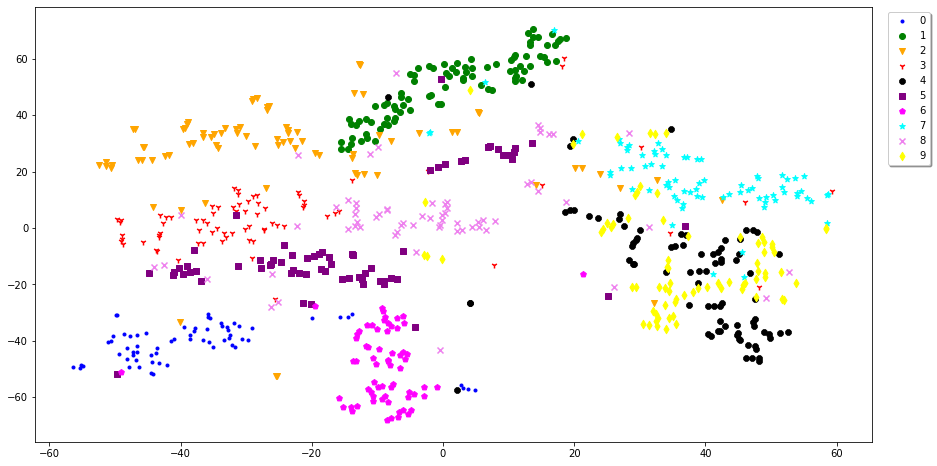

In [6]:
plot_mnist_tsne(tnse_vecs_1, test_labels)

### 2. Using PCA vectors

In [7]:
pca = PCA(n_components=50)
pca_vecs = pca.fit_transform(test_set)
variance = np.sum(pca.explained_variance_ratio_)
print("PCA Done: Shape : ", pca_vecs.shape , " Total capurted variance : ", variance)
tnse_vecs_2 = TSNE(n_components=2, perplexity=10).fit_transform(pca_vecs)
print("TSNE done ", tnse_vecs_2.shape)

PCA Done: Shape :  (750, 50)  Total capurted variance :  0.8369942143450763
TSNE done  (750, 2)


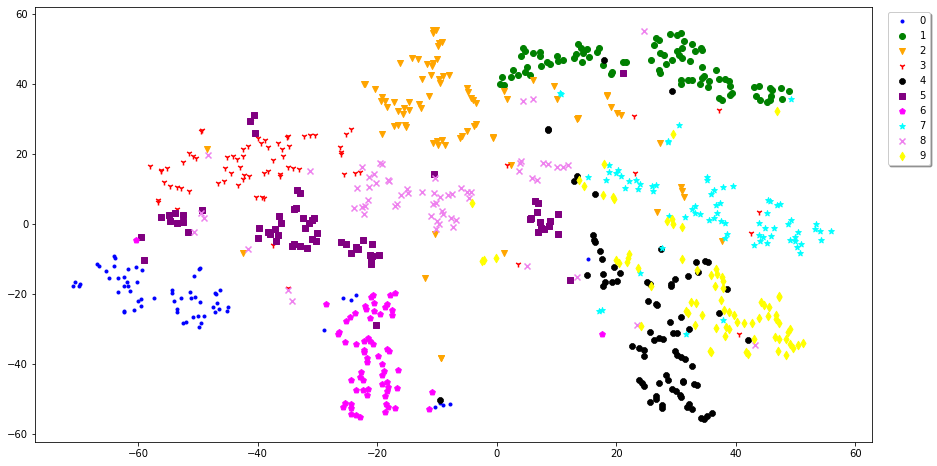

In [8]:
plot_mnist_tsne(tnse_vecs_2, test_labels)

### 3. Using Autoencoder vectors

#### Load saved models

In [9]:
auto_encoder_model = keras.models.load_model("./model_store/model_1/auto-encoder-model.h5")
auto_encoder_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
model (Model)                (None, 36)                111076    
_________________________________________________________________
model_1 (Model)              (None, 784)               111824    
Total params: 222,900
Trainable params: 222,900
Non-trainable params: 0
_________________________________________________________________


In [10]:
encoder_model = keras.models.load_model("./model_store/model_1/encoder-model.h5")
encoder_model.load_weights("./model_store/model_1/encoder-model-weights.h5")
encoder_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 36)                2340      
Total params: 111,076
Trainable params: 111,076
Non-trainable params: 0
_________________________________________________________________


In [11]:
decoder_model = keras.models.load_model("./model_store/model_1/decoder-model.h5")
decoder_model.load_weights("./model_store/model_1/decoder-model-weights.h5")
decoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 36)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2368      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 111,824
Trainable params: 111,824
Non-trainable params: 0
_________________________________________________________________


#### do some sanity check of the models

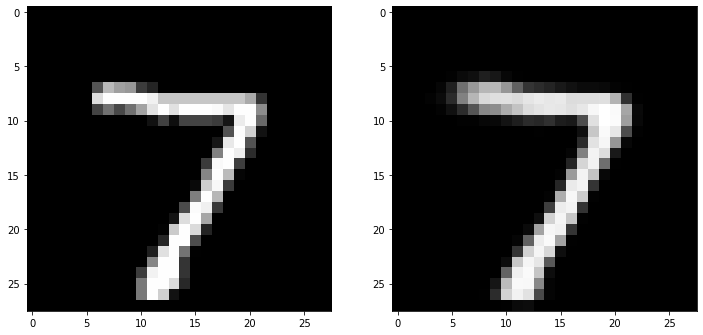

In [16]:
img = test_set[0]
_,plots = plt.subplots(1,2, figsize=(12,6))
plots[0].imshow(img.reshape((28,28)), cmap="gray")
encoded = encoder_model.predict(img.reshape((1,28*28)))
decoded = decoder_model.predict(encoded)
plots[1].imshow(decoded.reshape((28,28)), cmap="gray")

#### Now lets encode our test set and then do TSNE

In [17]:
encoded_images = encoder_model.predict(test_set)
encoded_images.shape

(750, 36)

In [18]:
tnse_vecs_3 = TSNE(n_components=2, perplexity=10).fit_transform(encoded_images)
print("TSNE done ", tnse_vecs_3.shape)

TSNE done  (750, 2)


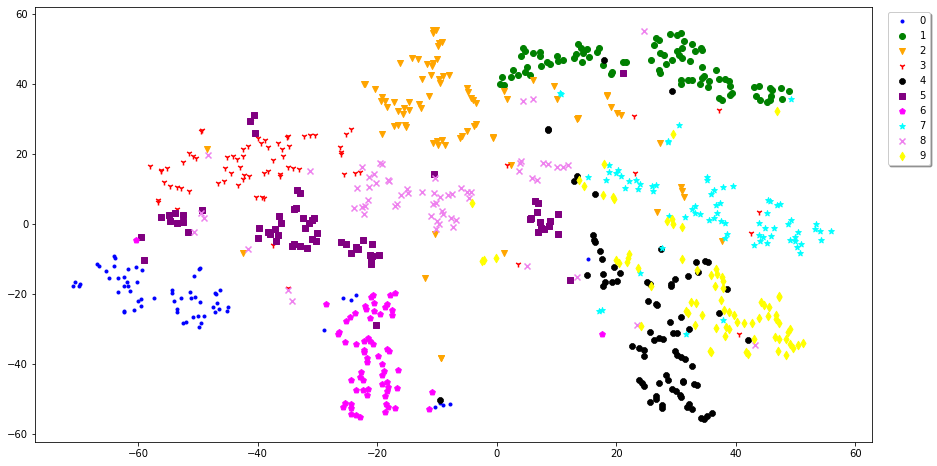

In [19]:
plot_mnist_tsne(tnse_vecs_2, test_labels)